# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [790]:
#!pip install iso3166

In [145]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [146]:
import warnings

warnings.filterwarnings("ignore")

### Import Statements

In [147]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from iso3166 import countries
from datetime import datetime, timedelta

In [148]:
import iso3166

In [149]:
import plotly.graph_objs as go

### Notebook Presentation

In [150]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [151]:
corrected_df = pd.read_csv("Space_Corrected.csv", parse_dates=["Datum"])

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [152]:
corrected_df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

In [153]:
corrected_df['Datum'] = pd.to_datetime(corrected_df['Datum'], errors='coerce')

In [154]:
corrected_df["Year"] = corrected_df.Datum.dt.year

In [155]:
corrected_df["Month"] = corrected_df.Datum.dt.month

In [156]:
corrected_df['Year'] = corrected_df['Year'].replace([float('inf'), float('-inf'), float('nan')], np.nan)

In [157]:
corrected_df["Year"] = corrected_df["Year"].astype('Int64')

In [158]:
corrected_df.columns = corrected_df.columns.str.strip()

In [159]:
corrected_df["Rocket"] = pd.to_numeric(corrected_df["Rocket"], errors="coerce")

In [160]:
corrected_df.shape

(4324, 9)

In [161]:
corrected_df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       'Rocket', 'Status Mission', 'Year', 'Month'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [162]:
corrected_df.isna().sum()

Company Name         0
Location             0
Datum              126
Detail               0
Status Rocket        0
Rocket            3375
Status Mission       0
Year               126
Month              126
dtype: int64

In [163]:
mean_price = corrected_df["Rocket"].mean()

In [164]:
corrected_df["Rocket"].replace(np.nan, mean_price, inplace=True)

In [165]:
corrected_df.isna().values.sum()

378

## Descriptive Statistics

In [166]:
corrected_df.describe()

,Rocket,Year,Month
count,"4,324.00","4,198.00","4,198.00"
mean,129.80,"1,987.46",6.74
std,67.07,18.09,3.42
min,5.30,"1,957.00",1.00
25%,129.80,"1,972.00",4.00
50%,129.80,"1,985.00",7.00
75%,129.80,"2,002.00",10.00
max,450.00,"2,020.00",12.00


In [167]:
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}

In [168]:
corrected_df["Country"] = corrected_df["Location"].str.split(", ").str[-1].replace(countries_dict)
corrected_df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8.00,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8.00,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,129.80,Success,2020,8.00,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7.00,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7.00,USA


# Number of Launches per Company

A chart that shows the number of space mission launches by organisation.

In [169]:
num_of_flights = corrected_df["Company Name"].value_counts()

In [170]:
bar = px.bar(x=num_of_flights.index[:20],
             y=num_of_flights.values[:20],
             color=num_of_flights.values[:20],
             title="Number of Launches per Organisation",
             color_continuous_scale="Aggrnyl")

bar.update_layout(
    title_font_size=18,
    xaxis_title="Organisation",
    xaxis_title_font_size=14,
    yaxis_title="Number of Launches",
    yaxis_title_font_size=14,
    coloraxis_showscale=False
)

bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [171]:
rocket_status = corrected_df["Status Rocket"].value_counts()

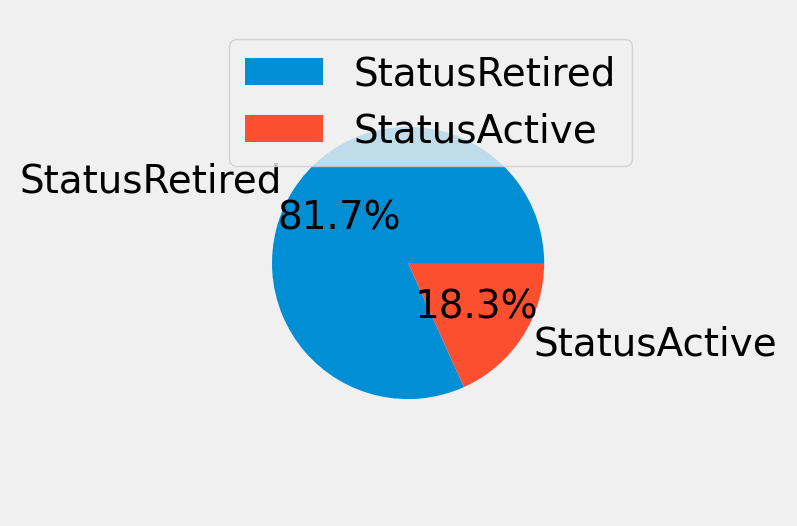

In [172]:
plt.figure(figsize=(3, 3), dpi=200)
plt.pie(rocket_status, labels=rocket_status.index, 
        autopct="%1.1f%%", 
        radius=0.7)
plt.legend()
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [173]:
mission_status = corrected_df["Status Mission"].value_counts()

In [174]:
mission_status

Status Mission
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [175]:
bar = px.bar(mission_status, 
             color=mission_status.values)

bar.update_layout(xaxis_title="Mission Status",
                  yaxis_title="Number of Missions",
                  coloraxis_showscale=False)
bar.show()

# How Expensive are the Launches? 

A histogram and the visualization of the distribution. The price column is given in USD millions. 

In [176]:
launch_prices = corrected_df.groupby("Company Name").agg({"Rocket": pd.Series.count})

In [177]:
launch_prices.sort_values("Rocket",ascending=False, inplace=True)

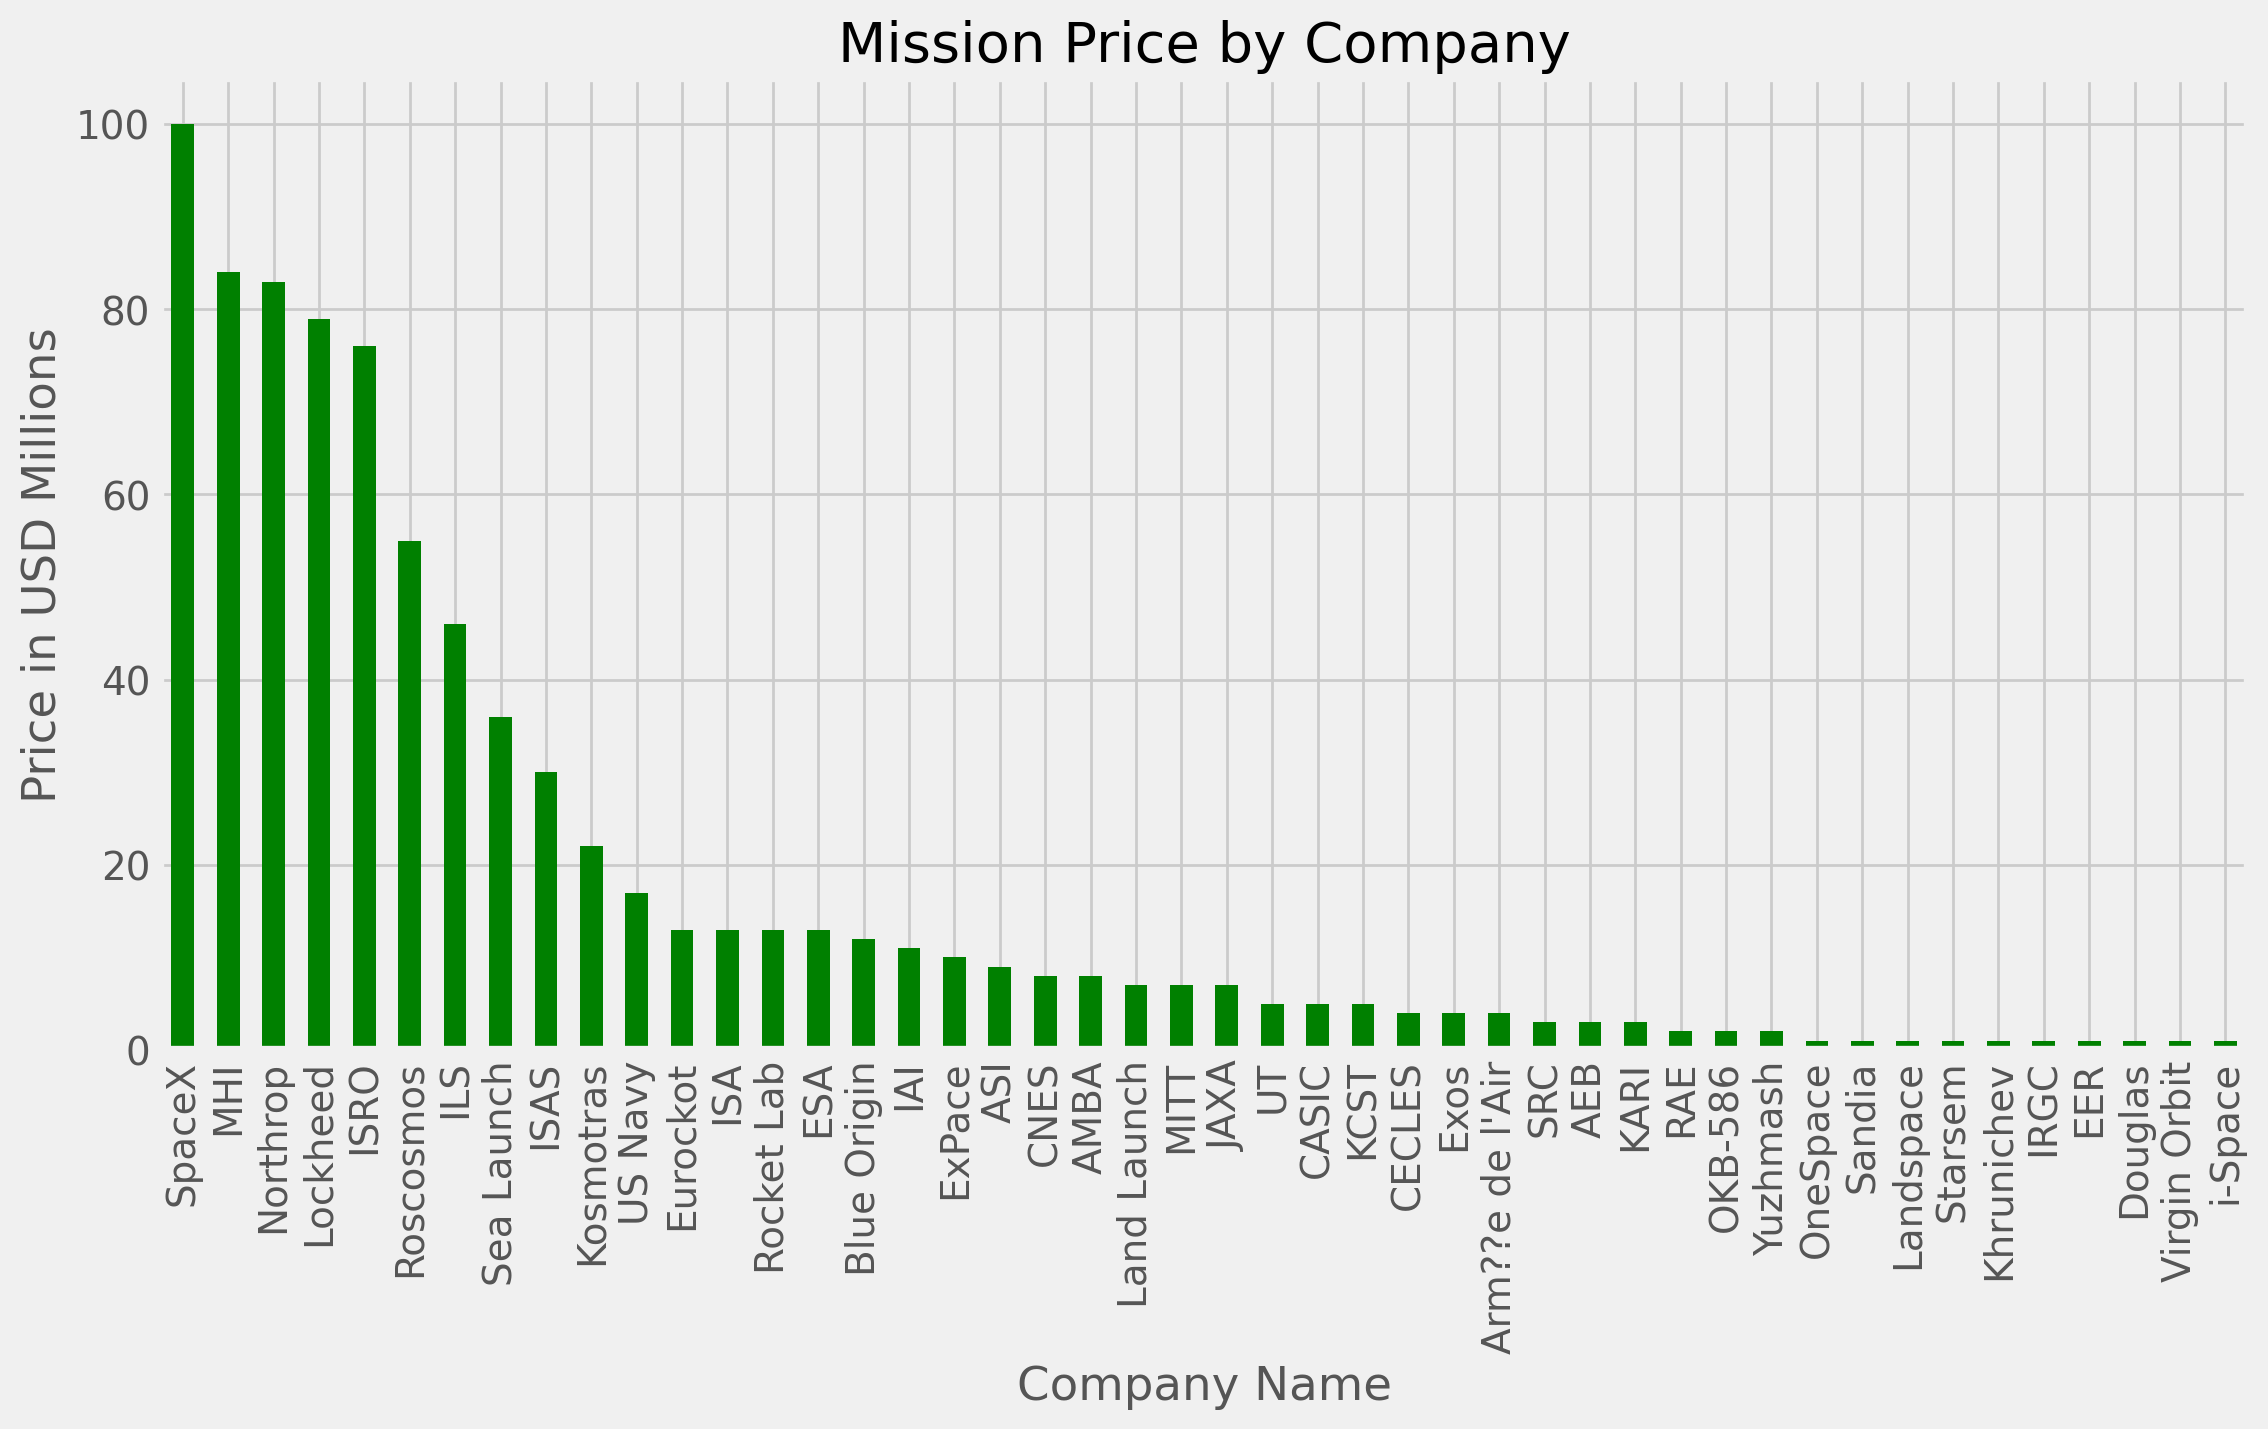

In [178]:
plt.figure(figsize=(12, 6), dpi=200)
launch_prices['Rocket'][10:].plot(kind='bar', color="green")
plt.title('Mission Price by Company')
plt.xlabel('Company Name')
plt.ylabel('Price in USD Millions')
plt.xticks(rotation=90)
plt.show()

# A Choropleth Map to Show the Number of Launches by Country

Wrangle the Country Names

Using a 3 letter country code for each country.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


Using the iso3166 package to convert the country names to Alpha3 format.

In [179]:
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}

In [180]:
# Create a dictionary mapping country names to alpha3 codes
country_dict = {c.name: c.alpha3 for c in countries}

# Replace country names with alpha3 codes using the dictionary
corrected_df['alpha3'] = corrected_df['Country'].map(country_dict)

# Manually handle special cases for North Korea and South Korea
corrected_df.loc[corrected_df['Country'] == 'North Korea', 'alpha3'] = 'PRK'
corrected_df.loc[corrected_df['Country'] == 'South Korea', 'alpha3'] = 'KOR'

# Display the DataFrame
print(corrected_df.head())

  Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                      Datum                                        Detail  \
0 2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00+00:00                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission  Year  Month     Country alpha3  
0  StatusActive   50.00        Success  2020   8.

In [181]:
corrected_df["alpha3"] = corrected_df["alpha3"].fillna("USA")

In [182]:
corrected_df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year,Month,Country,alpha3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8.00,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8.00,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,129.80,Success,2020,8.00,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7.00,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7.00,USA,USA


In [183]:
launches_per_country = corrected_df.groupby(["Country","alpha3"])["Status Mission"].count().reset_index()

In [184]:
launches_per_country.sort_values("Status Mission", ascending=False, inplace=True)

In [185]:
world_map = px.choropleth(launches_per_country,
                          locations='alpha3',
                          color='Status Mission',
                          hover_name="Country",
                          color_continuous_scale=px.colors.sequential.Aggrnyl)

world_map.update_layout(coloraxis_showscale=True,
                        margin=dict(l=30, r=30, t=30, b=30))

world_map.show()

# A Choropleth Map to Show the Number of Failures by Country


In [186]:
failure_data = corrected_df[corrected_df['Status Mission'].isin(['Failure', 'Partial Failure', 'Prelaunch Failure'])]
failure_counts = failure_data.groupby(['Country', 'alpha3'])['Status Mission'].count().reset_index()

# Renaming columns for clarity
failure_counts.columns = ['Country', 'alpha3', 'Failure_Count']

In [187]:
failure_counts

,Country,alpha3,Failure_Count
0,Australia,AUS,3
1,Brazil,BRA,3
2,China,CHN,25
3,France,FRA,18
4,India,IND,13
5,Iran,USA,9
6,Israel,ISR,2
7,Japan,JPN,13
8,Kazakhstan,KAZ,93
9,New Zealand,NZL,2


In [188]:
fig = px.choropleth(failure_counts, 
                    locations="alpha3",
                    color="Failure_Count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Reds,
                    title="Mission Failure Counts by Country",
                    labels={'Failure_Count':'Failure Count'})

fig.update_layout(margin=dict(l=30, r=30, t=30, b=30))

fig.show()

# A Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [189]:
sunburst_data = corrected_df.groupby(["Country", "Company Name", "Status Mission"], as_index=False).agg({"Status Mission": pd.Series.count})

In [190]:
sunburst_data.sort_values("Status Mission", ascending=False, inplace=True)

In [191]:
sunburst = px.sunburst(sunburst_data,
                       path=["Status Mission", "Company Name", "Country"],
                       values="Status Mission",
                       title="Missions per Country",
                       height=600, width=800)
sunburst.show()

# Analyzing the Total Amount of Money Spent by Organisation on Space Missions

In [192]:
money_spent = corrected_df.groupby("Company Name", as_index=False).agg({"Rocket": pd.Series.sum})

In [193]:
money_spent = money_spent[money_spent["Rocket"] > 0]

In [194]:
money_spent.sort_values("Rocket",ascending=False, inplace=True)

In [195]:
bar = px.bar(x=money_spent["Company Name"],
             y=money_spent["Rocket"],
             hover_name=money_spent["Company Name"],
             title="Money Spent per Organisation",
             color=money_spent["Company Name"])

bar.update_layout(xaxis_title="Organisations",
                  yaxis_title="Money Spent",
                  width=1300,
                  height=700)
bar.show()

# Analyzing the Amount of Money Spent by Organisation per Launch

In [196]:
money_spent = corrected_df.groupby("Company Name", as_index=False).agg({"Rocket": pd.Series.mean})

In [197]:
money_spent = money_spent[money_spent["Rocket"] > 0]

In [198]:
money_spent.sort_values("Rocket",ascending=False, inplace=True)

In [199]:
bar = px.bar(money_spent,
             x="Company Name",
             y="Rocket",
             color="Rocket",
             title="Cost per Launch",
             height=600,
             width=1300,
             color_continuous_scale=px.colors.sequential.algae)

bar.update_yaxes(title_text = "Total Cost in Millions")
bar.update_layout(coloraxis_showscale=False,
                  xaxis=dict(tickangle=45))
bar.show()

# Charting the Number of Launches per Year

In [200]:
launches_per_year = corrected_df.groupby("Year", as_index=False).agg({"Status Mission": pd.Series.count})

In [201]:
bar = px.bar(launches_per_year,
             x="Year",
             y="Status Mission",
             color="Year",
             title="Number of Lanuches per Year")

bar.update_layout(
    title_font_size=18,
    xaxis_title="Year",
    xaxis_title_font_size=14,
    yaxis_title="Number of Missions",
    yaxis_title_font_size=14,
)
bar.show()

# Charting the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimposing a rolling average on the month on month time series chart. 

In [202]:
monthly_launch = corrected_df.groupby(by='Month', as_index=False).agg({'Status Mission': pd.Series.count})

In [203]:
monthly_rolling = monthly_launch['Status Mission'].expanding().mean()

In [204]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [205]:
monthly_launch['Month'] = monthly_launch['Month'].map(month_mapping)

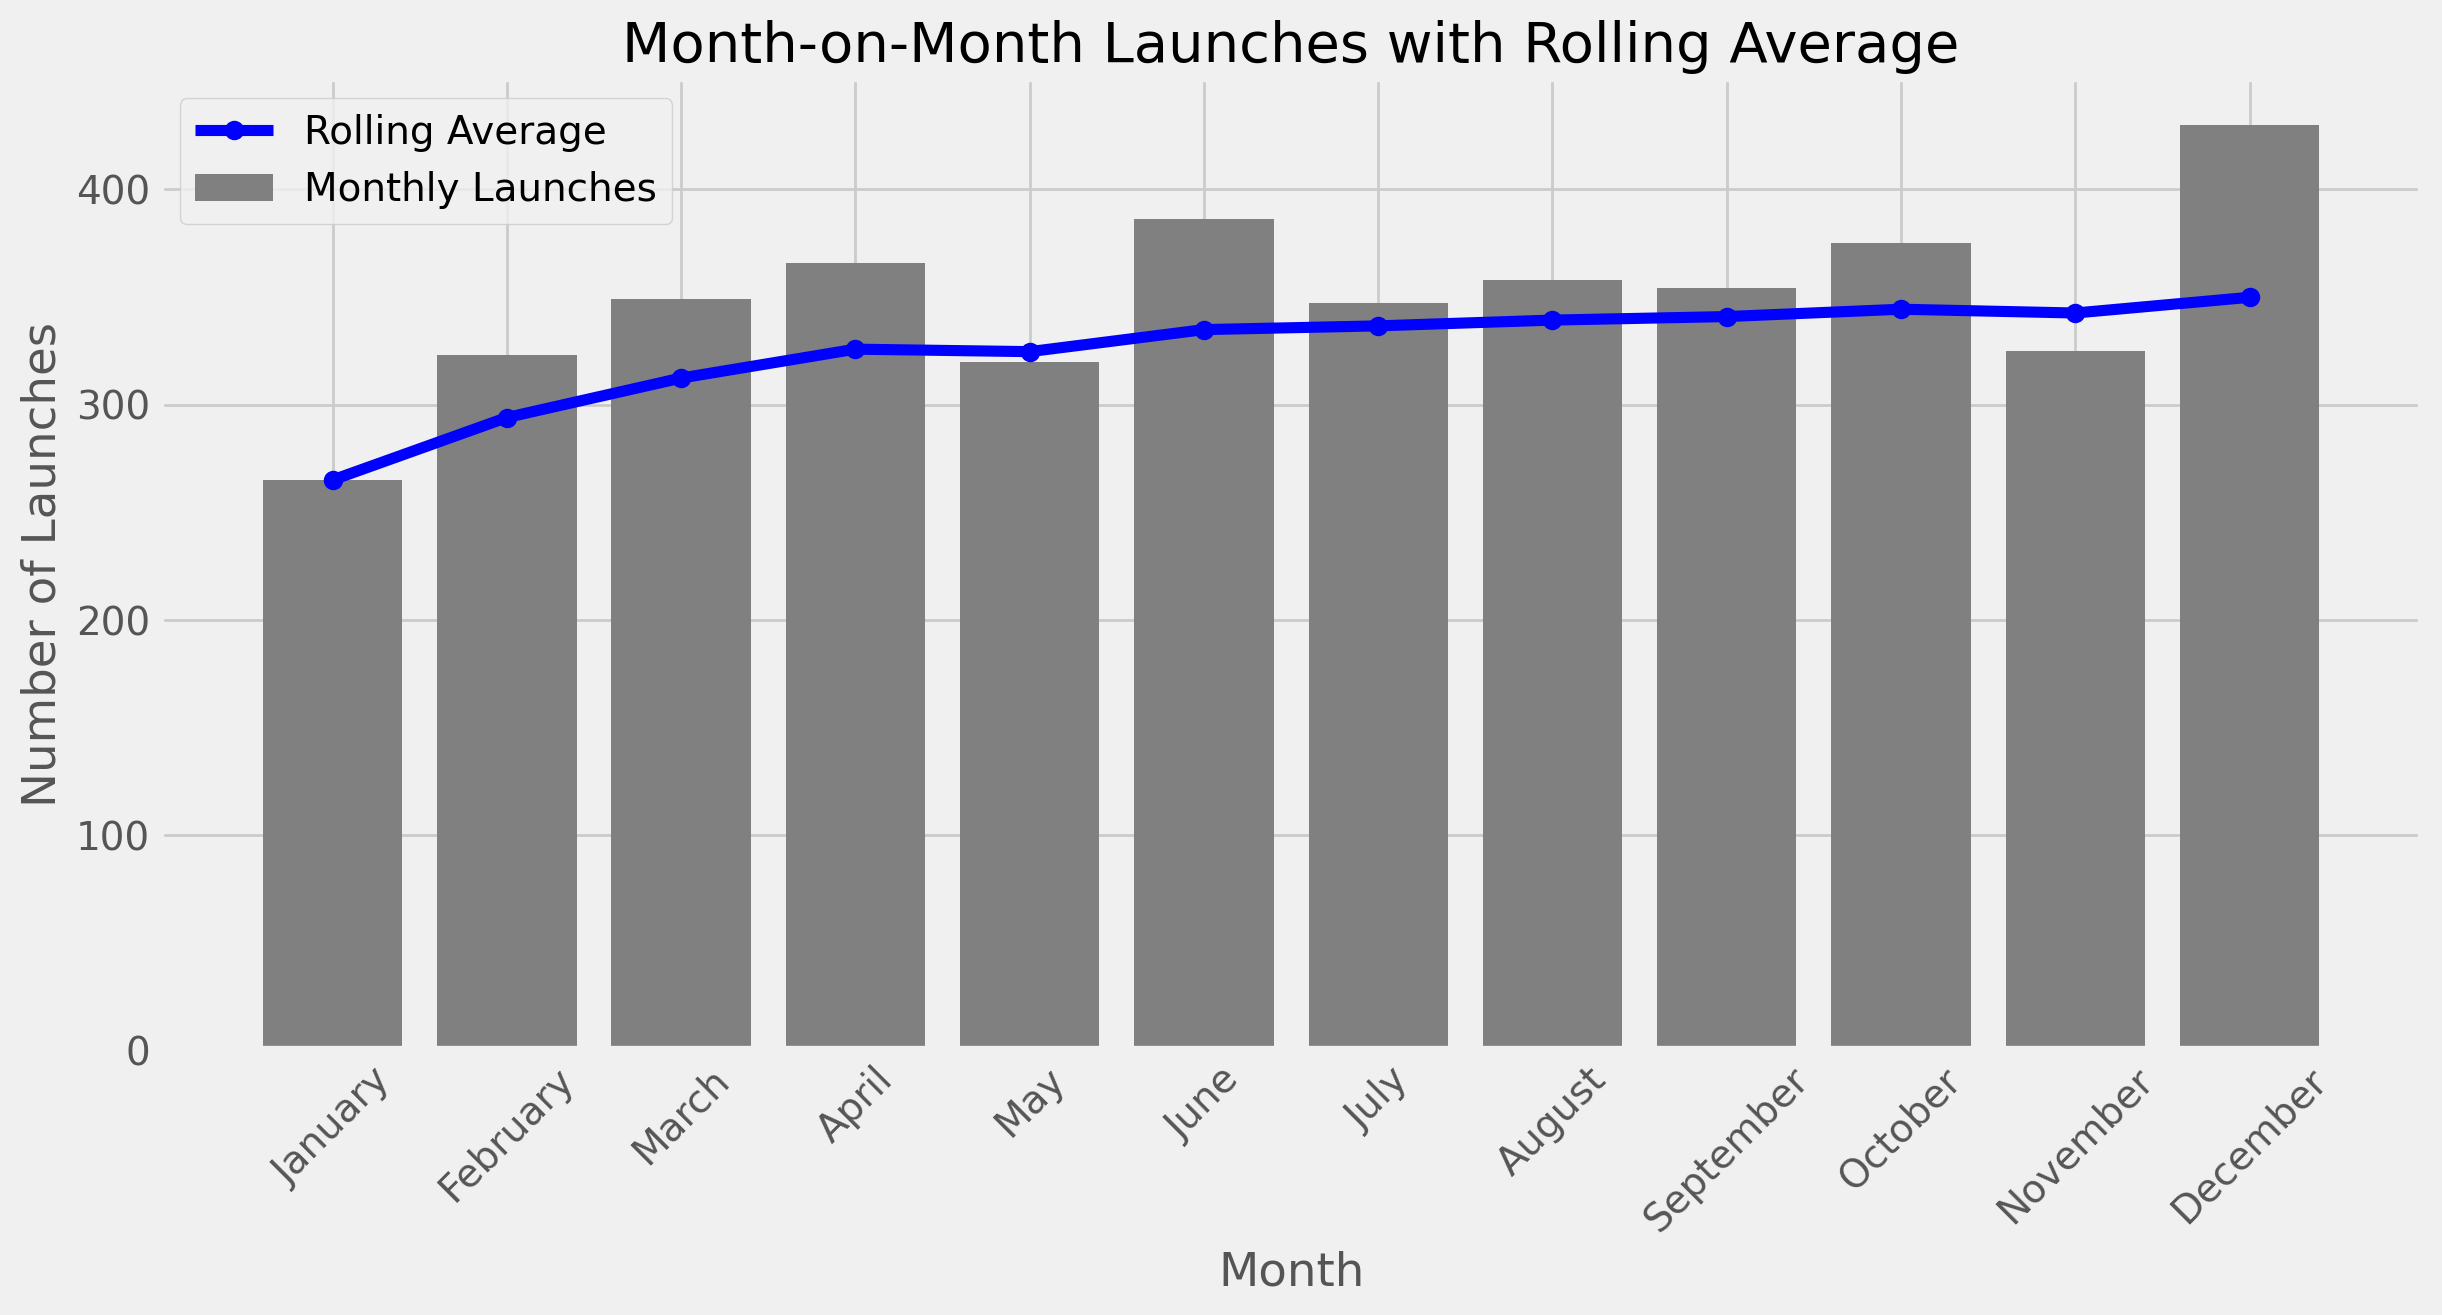

In [206]:
plt.figure(figsize=(13, 6), dpi=200)

plt.bar(monthly_launch['Month'], monthly_launch['Status Mission'], label='Monthly Launches', color="grey")

plt.plot(monthly_launch['Month'], monthly_rolling, color='blue', linestyle='-', marker='o', label='Rolling Average')

plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Month-on-Month Launches with Rolling Average')

plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Launches per Month: Months that are most popular and least popular for launches?

Some months have better weather than others.

In [207]:
max_launches_month = monthly_launch.loc[monthly_launch['Status Mission'].idxmax()]
print(f"The month with the most launches is: {max_launches_month.iloc[0]}")

The month with the most launches is: December


In [208]:
max_launches_month = monthly_launch.loc[monthly_launch['Status Mission'].idxmin()]
print(f"The month with the least launches is: {max_launches_month.iloc[0]}")

The month with the least launches is: January


# Launch Price Variation Over Time? 

A line chart that shows the average price of rocket launches over time. 

In [209]:
prices_over_time = corrected_df.groupby("Year", as_index=False).agg({"Rocket": pd.Series.sum})

In [210]:
prices_over_time = prices_over_time.replace([float('inf'), float('-inf'), float('nan')], np.nan)

In [211]:
prices_over_time = prices_over_time.astype(int)

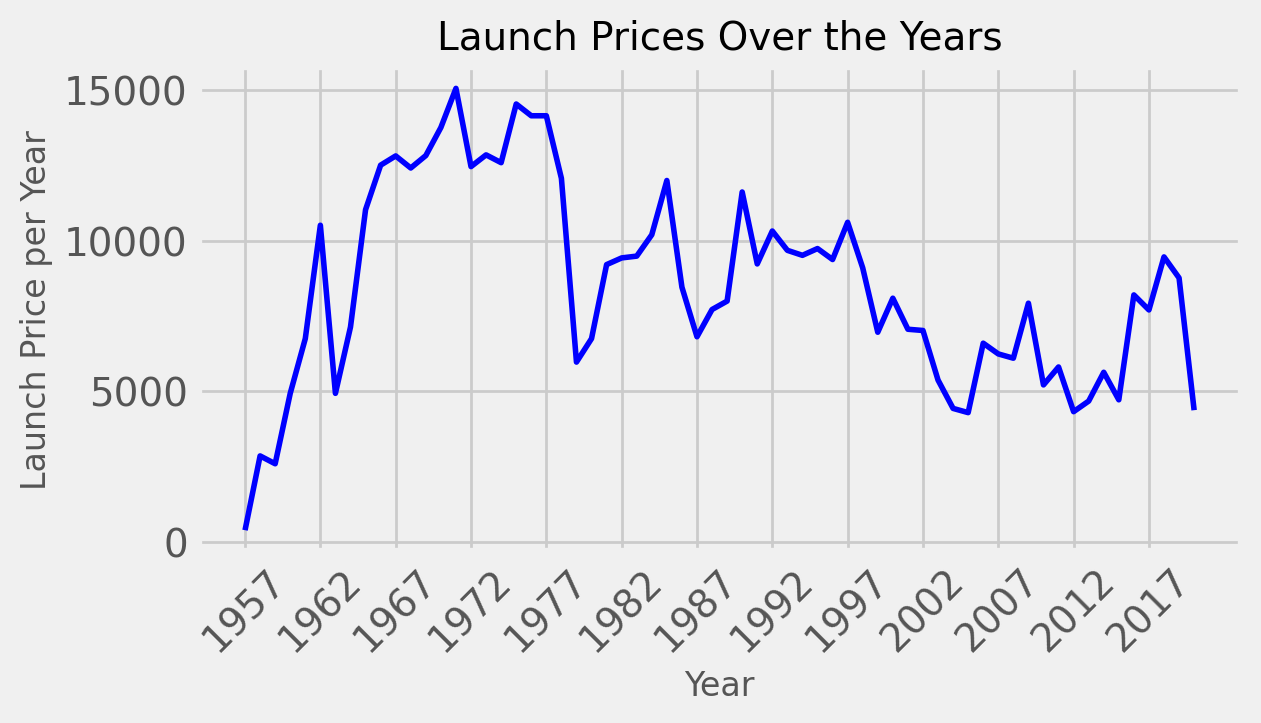

In [212]:
plt.figure(figsize=(6,3), dpi=200)
plt.style.use("fivethirtyeight")
line = sns.lineplot(prices_over_time,
                    x="Year",
                    y="Rocket",
                    color="blue",
                    linewidth=2)

plt.title("Launch Prices Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Launch Price per Year", fontsize=12)

plt.xticks(years, rotation=45)

plt.show()

# Charting the Number of Launches over Time by the Top 10 Organisations. 

In [213]:
launch_counts = corrected_df.groupby(['Company Name', 'Year']).size().reset_index(name='Launches')

# Finding the top 10 organizations with the highest number of launches
top_10_organisations = launch_counts.groupby('Company Name')['Launches'].sum().nlargest(10).index

# Filter data for top 10 organisations
top_10_data = launch_counts[launch_counts['Company Name'].isin(top_10_organisations)]

In [214]:
top_10_data = top_10_data[top_10_data['Year'] >= 0]

In [215]:
pivot_data = top_10_data.pivot(index='Year', columns='Company Name', values='Launches').fillna(0)

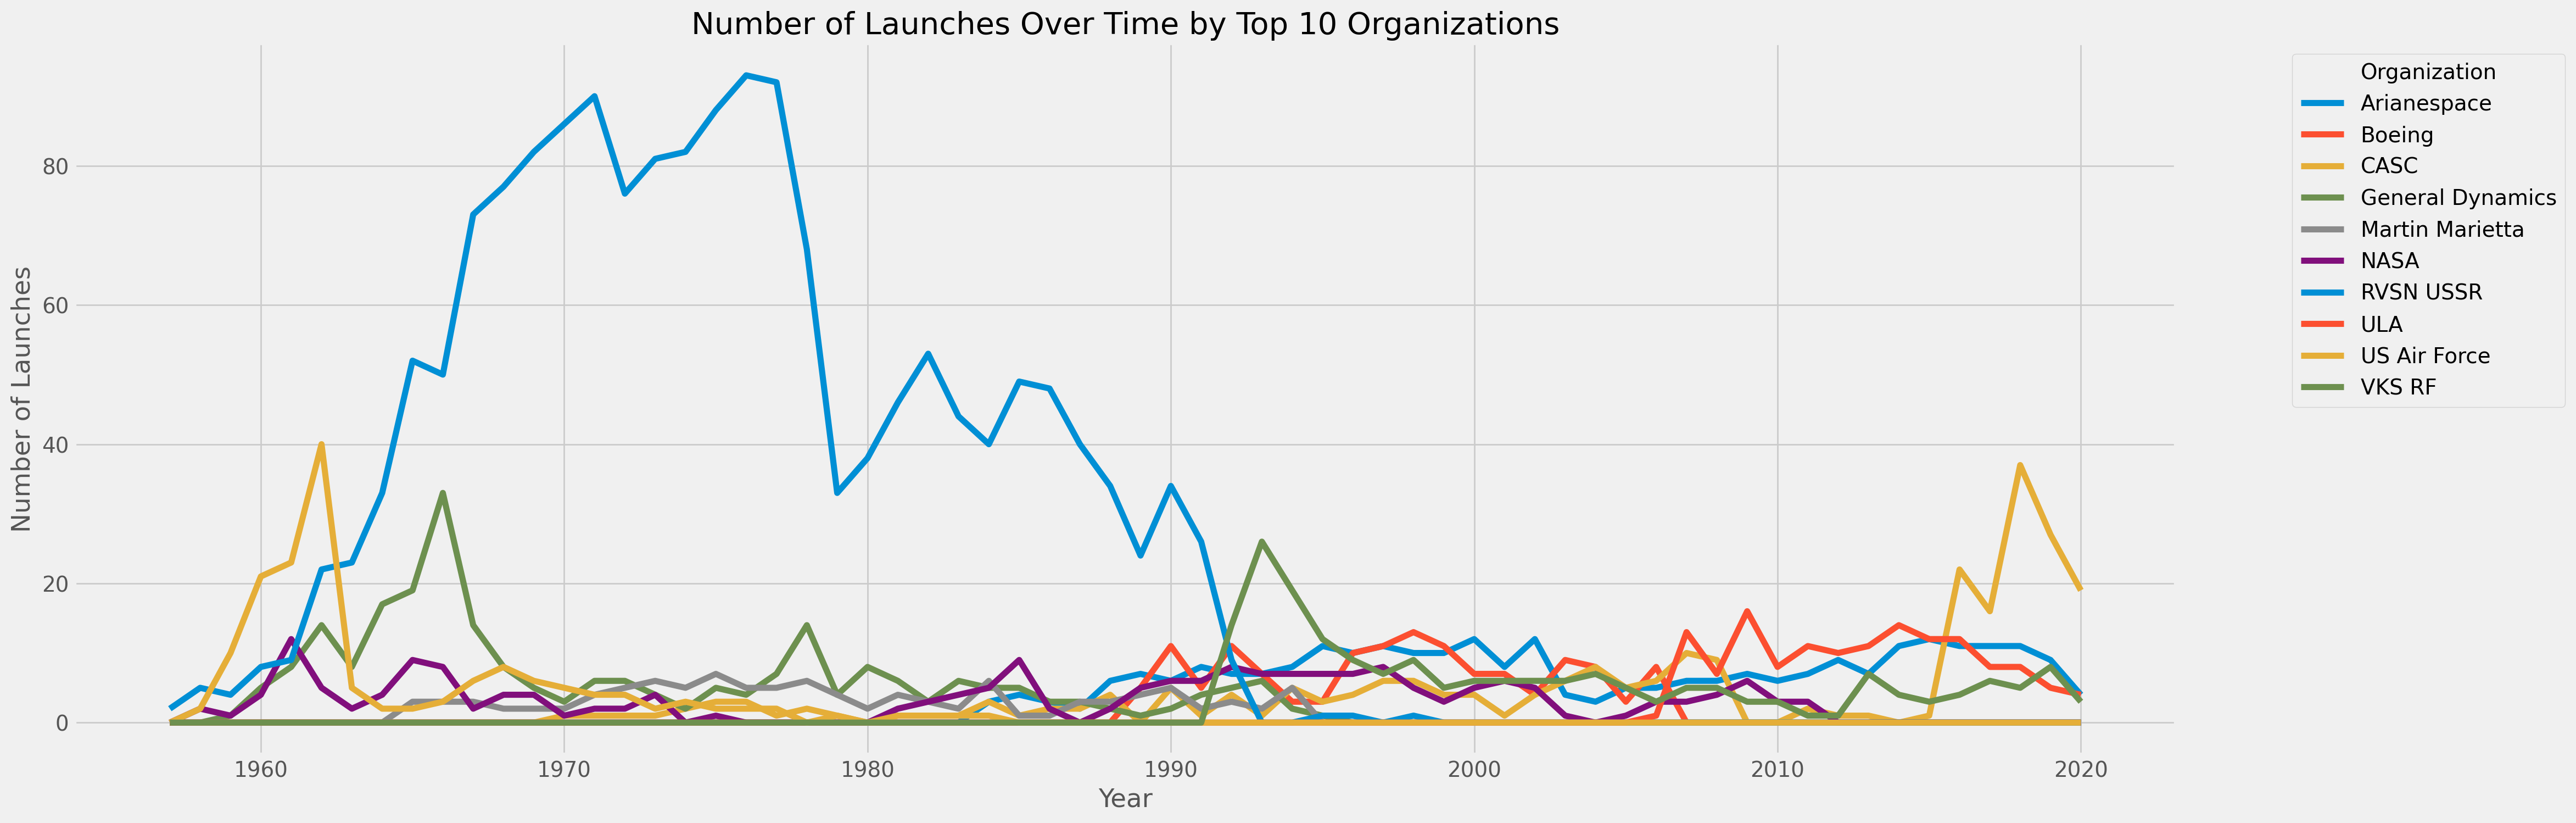

In [216]:
plt.figure(figsize=(22, 8), dpi=200)
for company in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[company], label=company)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Over Time by Top 10 Organizations')
plt.legend(title='Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [217]:
cold_war_df = corrected_df[(corrected_df['Year'] >= 1957) & (corrected_df['Year'] < 1991)]

In [218]:
usa_vs_russ_df = cold_war_df[cold_war_df['Country'].isin(['USA', 'Russian Federation'])]

## A Plotly Pie Chart comparing the total number of launches of the USSR and the USA

In [219]:
num_of_launches = usa_vs_russ_df.groupby("Country", as_index=False).agg({"Status Mission": pd.Series.count})

In [220]:
pie = px.pie(num_of_launches, 
             values="Status Mission", 
             names="Country",
             title=("Number of Launches Between USA and Russian Federation"),
             height=500, width=700)
pie.show()

## A Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [221]:
plt.style.use("ggplot")

In [222]:
num_of_missions = usa_vs_russ_df[usa_vs_russ_df['Country'].isin(['USA', 'Russian Federation'])]

In [223]:
chart_df = num_of_missions.groupby(['Year', 'Country']).size().unstack().fillna(0)

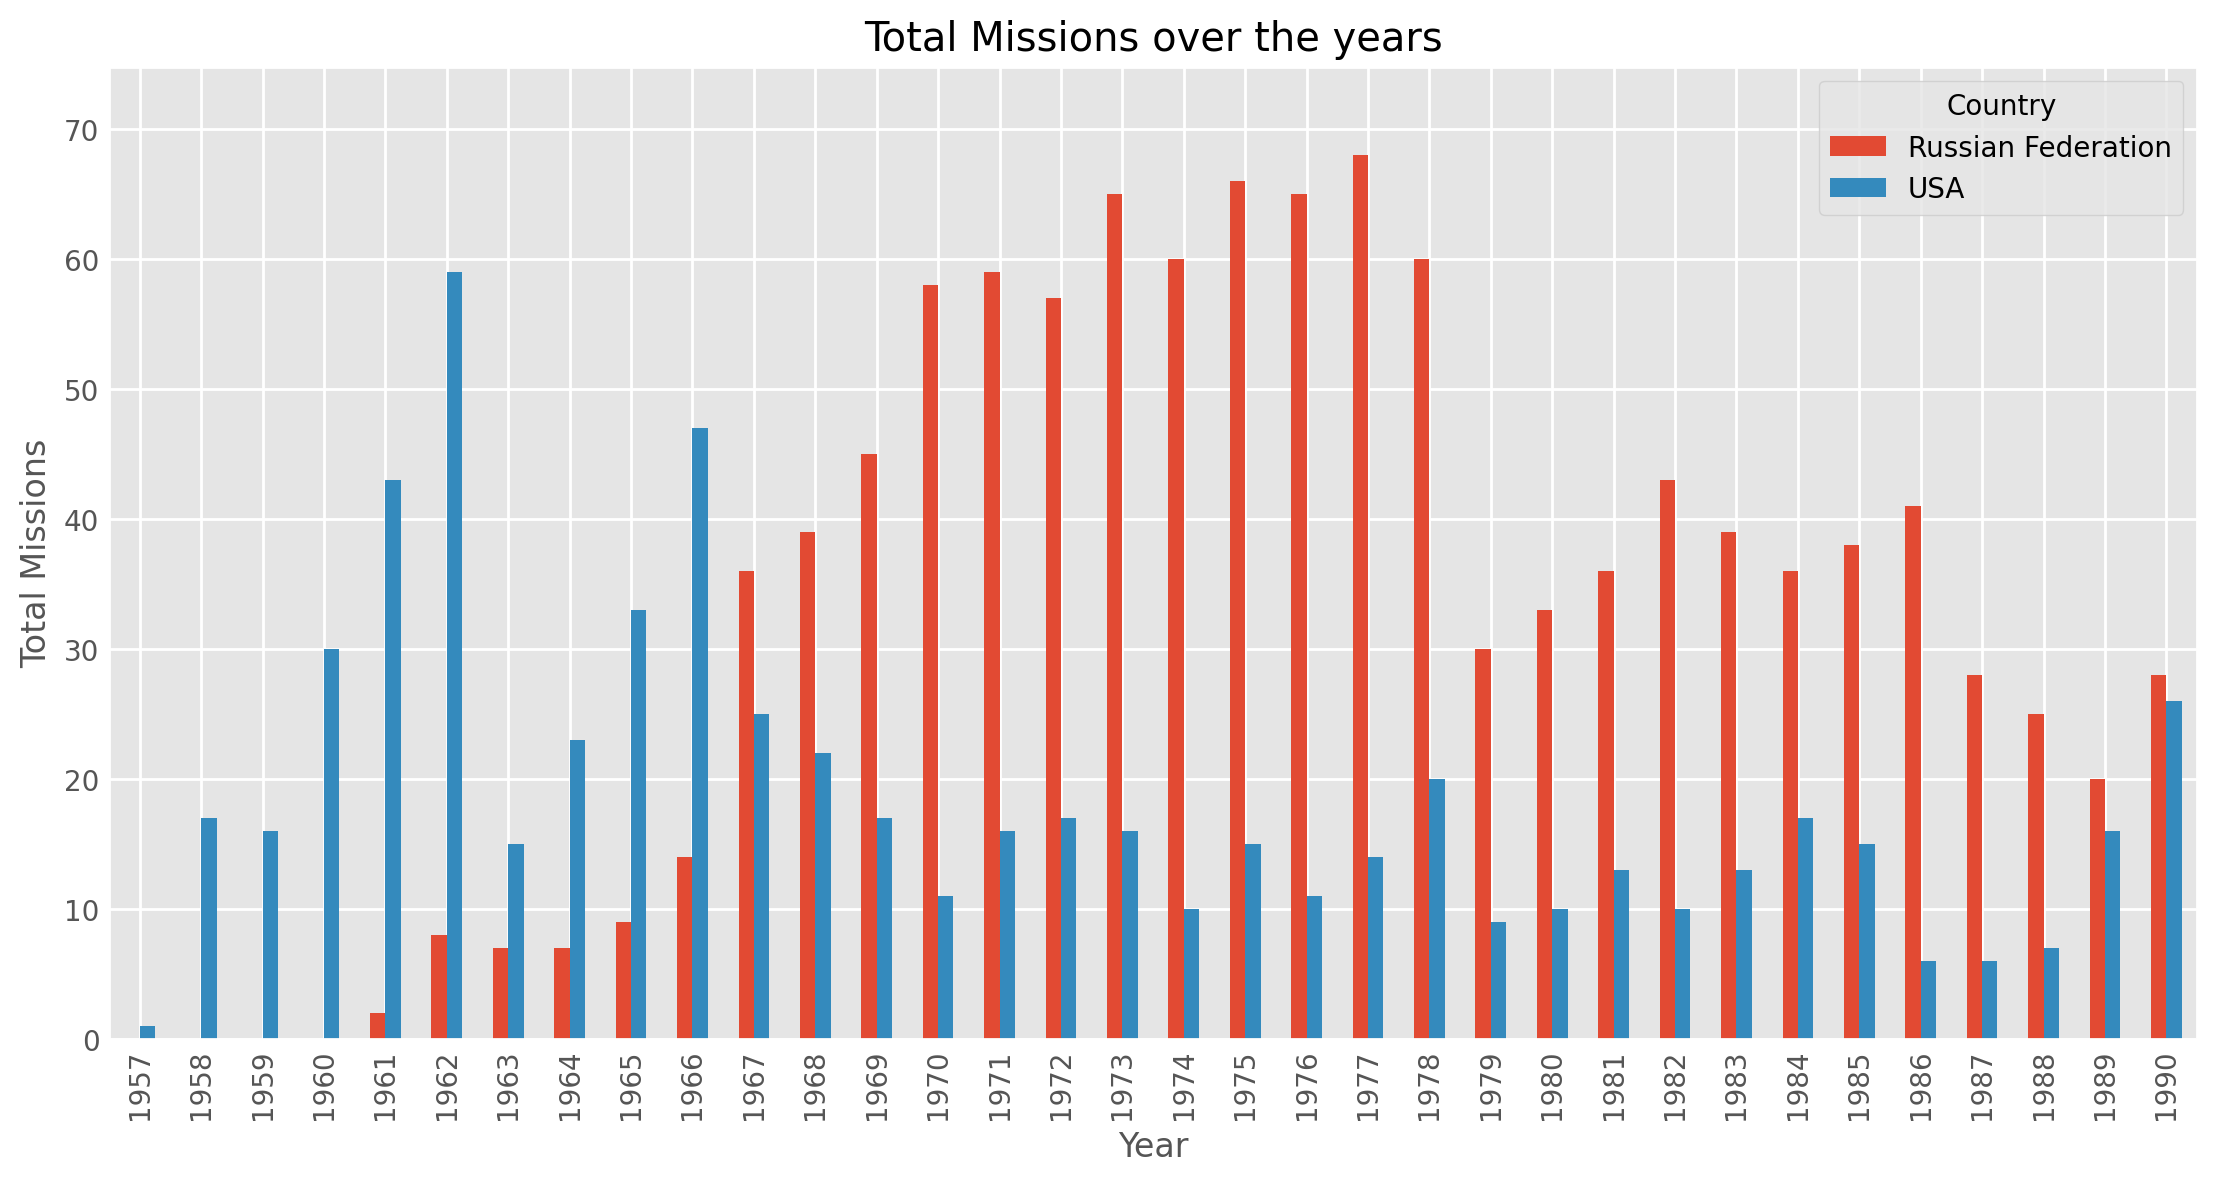

In [224]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
chart_df.plot(kind='bar', ax=ax)
plt.title('Total Missions over the years')
plt.xlabel('Year')
plt.ylabel('Total Missions')
plt.legend(title='Country')
plt.xticks(rotation=90)
padding_x = 0.05
padding_y = 0.1
ax.margins(x=padding_x, y=padding_y)
plt.show()

## Charting the Total Number of Mission Failures Year on Year.

In [225]:
cold_war_df["Status Mission"].value_counts()

Status Mission
Success              2175
Failure               217
Partial Failure        70
Prelaunch Failure       1
Name: count, dtype: int64

In [226]:
new_failure_data = usa_vs_russ_df[usa_vs_russ_df['Status Mission'].isin(['Failure', 'Partial Failure', 'Prelaunch Failure'])]
new_failure_counts = new_failure_data.groupby(['Country', 'Year'])['Status Mission'].count().reset_index()

In [227]:
pivot_table = new_failure_counts.pivot(index='Year', columns='Country', values='Status Mission')

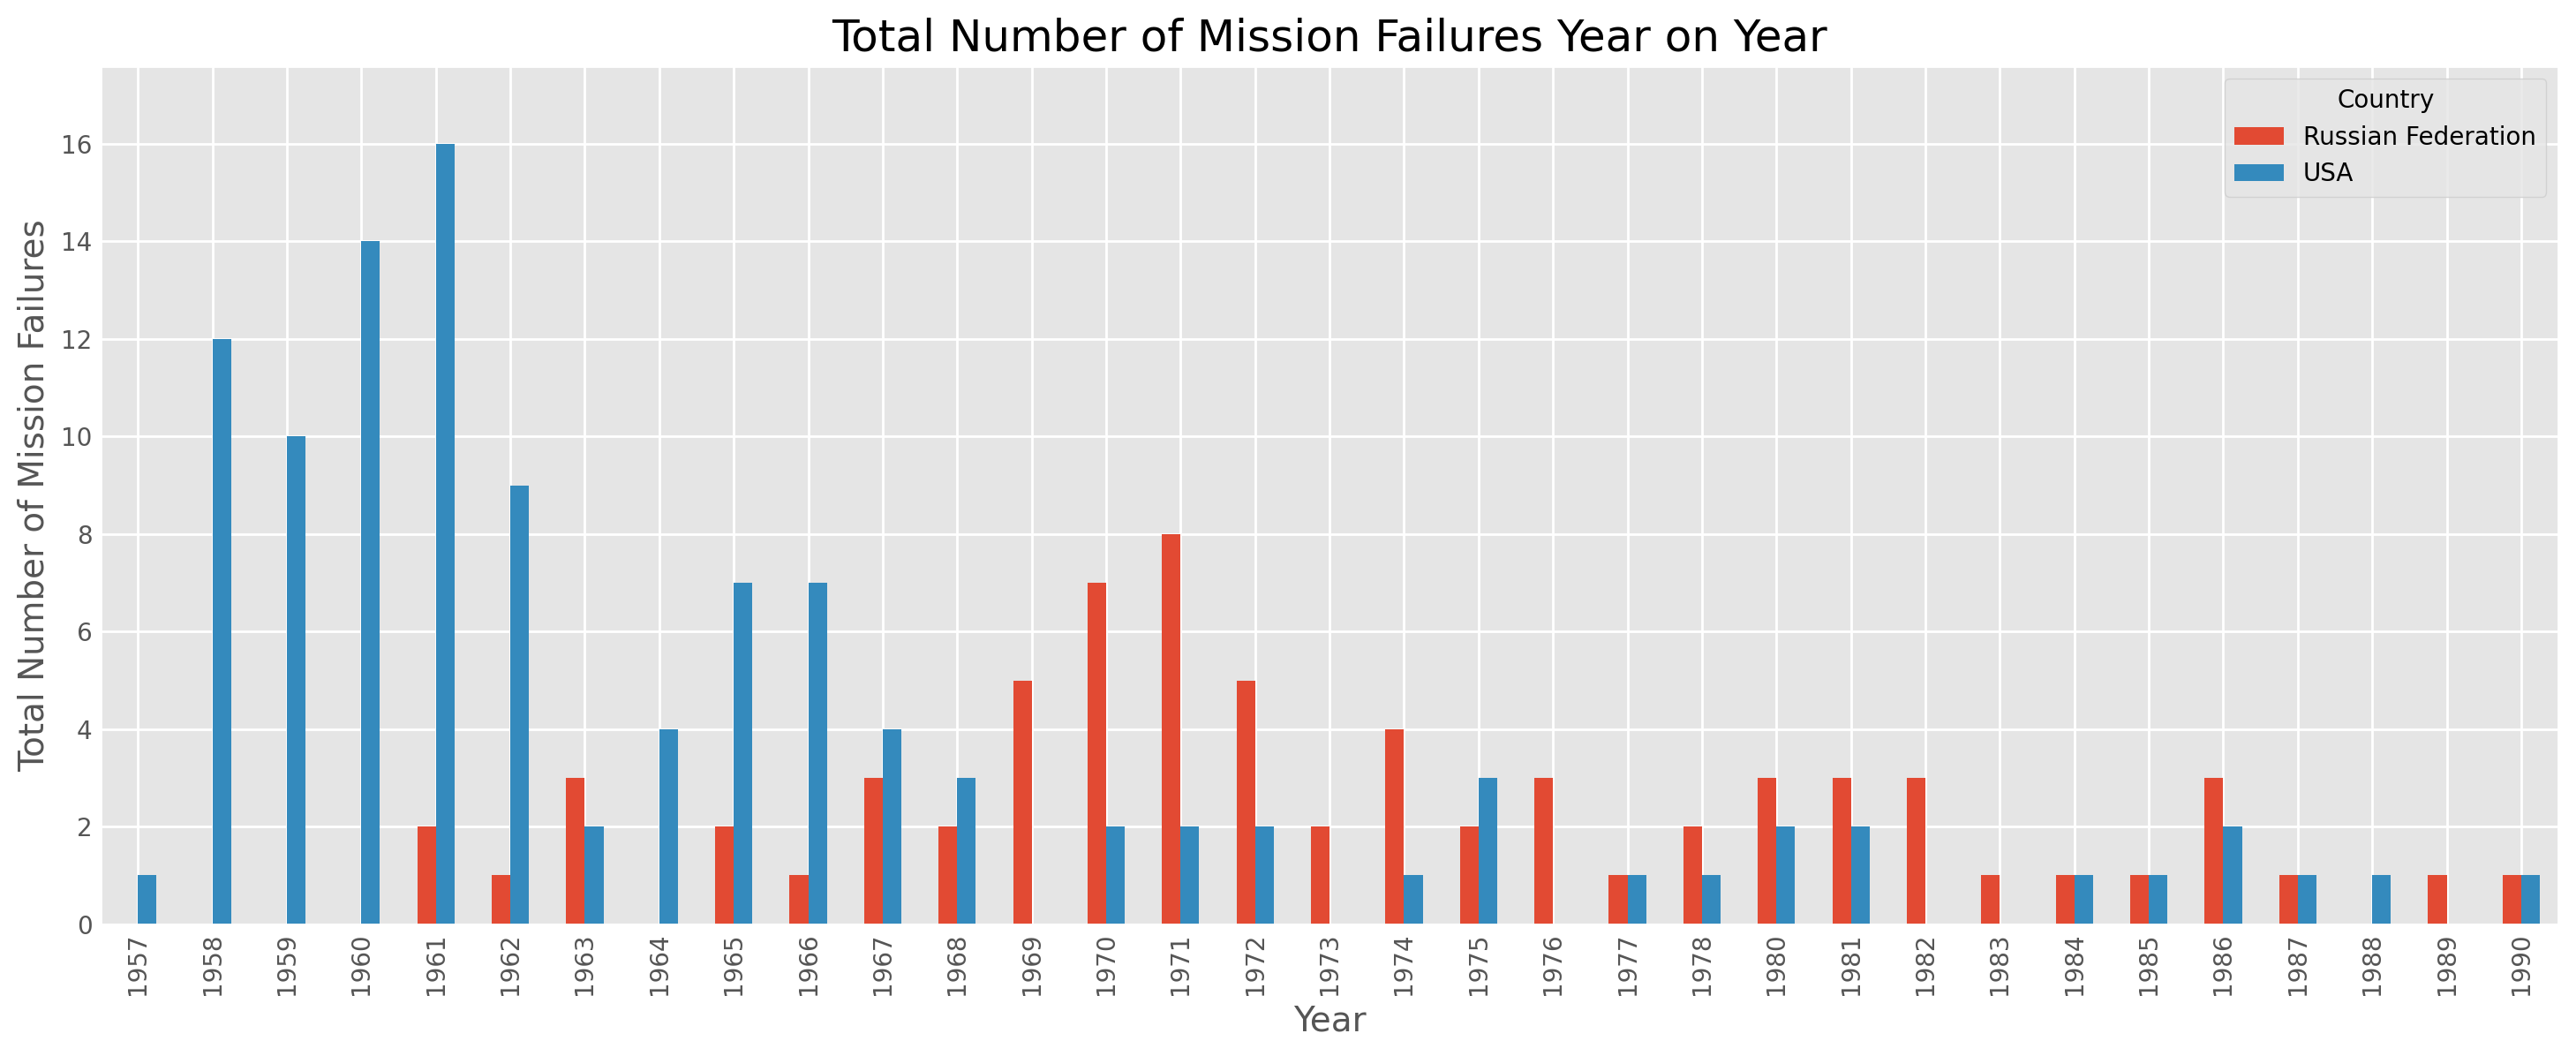

In [228]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=200)
pivot_table.plot(kind='bar', ax=ax)
plt.title('Total Number of Mission Failures Year on Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Mission Failures', fontsize=14)
plt.grid(True)
plt.legend(title='Country')
plt.xticks(rotation=90)
padding_x = 0.05
padding_y = 0.1
ax.margins(x=padding_x, y=padding_y)
plt.show()

## Charting the Percentage of Failures over Time

In [229]:
pivot_table_percentage = (pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100)

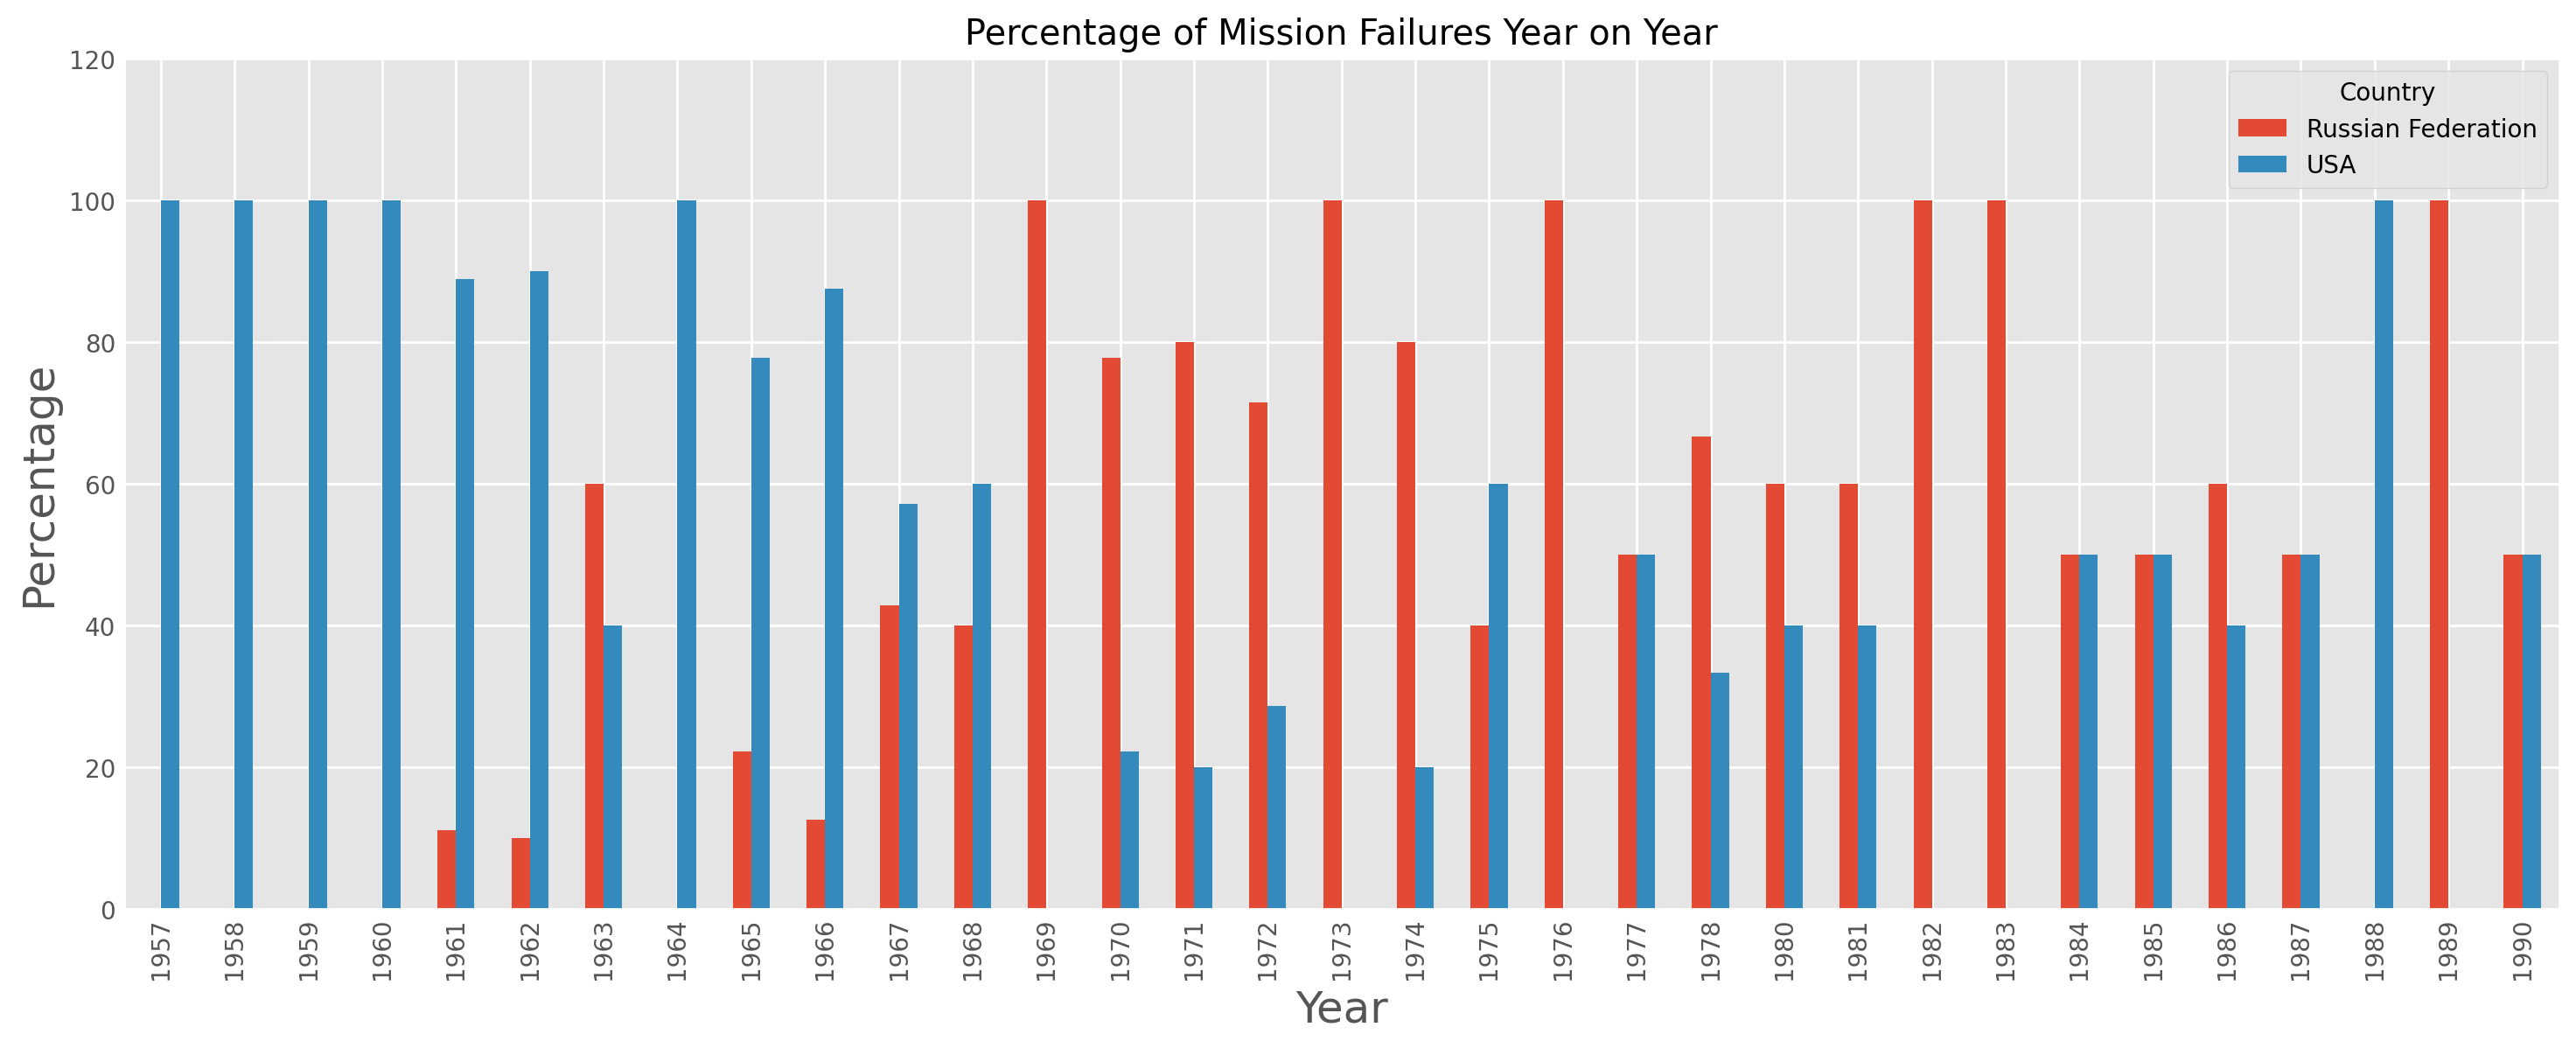

In [230]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=200)
pivot_table_percentage.plot(kind='bar', ax=ax)
plt.title('Percentage of Mission Failures Year on Year')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.grid(True)
plt.legend(title='Country')
plt.xticks(rotation=90)
padding_x = 0.2
padding_y = 0.2
ax.margins(x=padding_x, y=padding_y)
plt.show()

# Country that was in the Lead in terms of Total Number of Launches up to and including including 2020)

In [231]:
corrected_df['Status Mission'] = pd.to_numeric(corrected_df['Status Mission'], errors='coerce')

In [232]:
filtered_df = corrected_df[corrected_df['Year'] <= 2020]

In [233]:
grouped_data = corrected_df.groupby(['Year', 'Country']).size().reset_index(name='Launches')

In [234]:
most_launches_per_year = grouped_data.loc[grouped_data.groupby('Year')['Launches'].idxmax()]

In [235]:
fig = px.bar(most_launches_per_year, x='Year', y='Launches',
             title='Countries with the Most Launches per Year',
             labels={'Launches': 'Total Number of Launches'},
             hover_name='Country',
             color="Country")

bar.update_layout(
    title_font_size=18,
    xaxis_title="Year",
    xaxis_title_font_size=14,
    yaxis_title="Total Number of Launches",
    yaxis_title_font_size=14,
    coloraxis_showscale=False)

fig.show()

In [236]:
usa_vs_russ_df["Status Mission"].value_counts()

Status Mission
Success            1565
Failure             135
Partial Failure      48
Name: count, dtype: int64

In [237]:
corrected_df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year,Month,Country,alpha3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,NaN,2020,8.00,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,NaN,2020,8.00,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,129.80,NaN,2020,8.00,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,NaN,2020,7.00,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,NaN,2020,7.00,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,129.80,NaN,1958,2.00,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,129.80,NaN,1958,2.00,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,129.80,NaN,1957,12.00,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,129.80,NaN,1957,11.00,Kazakhstan,KAZ


In [238]:
success_data = usa_vs_russ_df[usa_vs_russ_df['Status Mission'] == 'Success']
success_count = success_data.groupby(['Country', 'Year'])['Status Mission'].count().reset_index()

In [239]:
pivot_table_2 = success_count.pivot(index='Year', columns='Country', values='Status Mission')

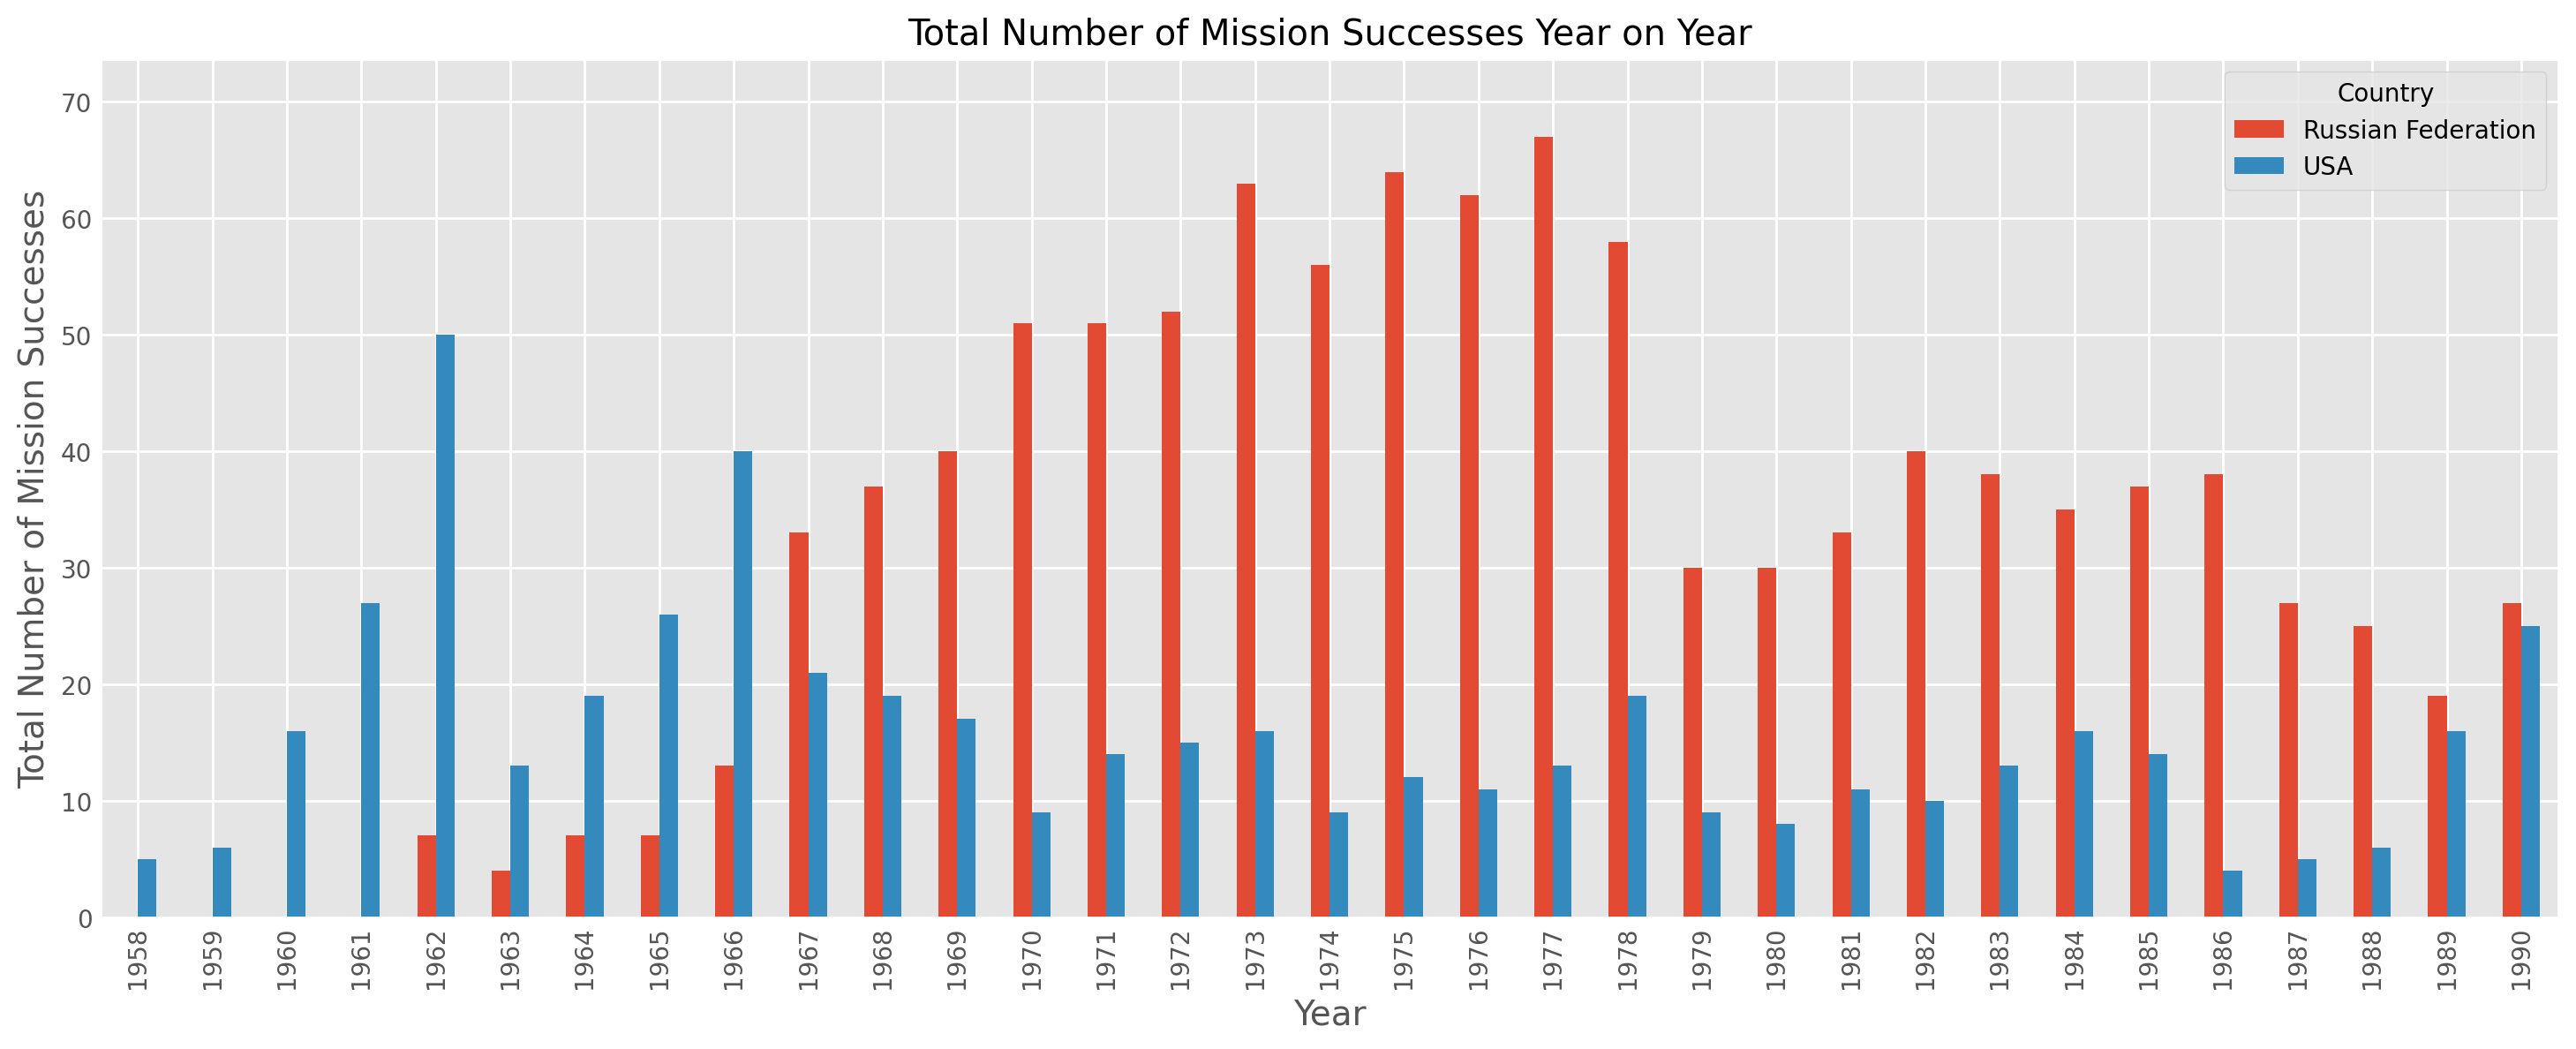

In [240]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=200)
pivot_table_2.plot(kind='bar', ax=ax)
plt.title('Total Number of Mission Successes Year on Year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Mission Successes', fontsize=14)
plt.grid(True)
plt.legend(title='Country')
plt.xticks(rotation=90)
padding_x = 0.05
padding_y = 0.1
ax.margins(x=padding_x, y=padding_y)
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

In [241]:
dt_index = pd.DatetimeIndex(corrected_df["Datum"])
years = dt_index.year

In [242]:
decades = years // 10 * 10

In [243]:
corrected_df["Decades"] = decades

In [244]:
decades_70s_80s_df = corrected_df.query('1970 <= Decades < 1990')

In [245]:
decades_70s_80s = decades_70s_80s_df.groupby(['Year', 'Company Name']).size().reset_index(name='Launches')

In [246]:
most_missions = decades_70s_80s.loc[decades_70s_80s.groupby('Year')['Launches'].idxmax()]

In [247]:
bar = px.bar(most_missions, 
             x="Year", 
             y="Launches",
             hover_name="Company Name", 
             color="Company Name",
             title="Organisation With the Most Launches during Cold War")

bar.update_layout(
    title_font_size=18,
    xaxis_title="Year",
    xaxis_title_font_size=14,
    yaxis_title="Number of Launches",
    yaxis_title_font_size=14,
    coloraxis_showscale=False)

bar.show()